# CLASIFICACIÓN

##  📌 ACTIVIDAD 2:  MNIST

### PASO 1: CARGA DE DATOS Y CREACIÓN DEL MODELO

Crea el notebook saa_02_p04_a2_JMP.ipynb donde realizar esta actividad. Queremos 
usar el fichero wine.csv para implementar un clasificador que nos indique el productor de la Toscana 
(primera columna, pueden ser 3 y ya están codificados como 1, 2 y 3) a partir de parámetros obtenidos 
de análisis químicos de sus vinos.

En la práctica de la unidad 1 vimos que una manera de mejorar los datos era usar una técnica de 
selección de características que consiste en realizar un estudio de sus propiedades estadísticas 
individuales y por parejas, y así descubrir si algunas podían descartarse porque en vez de aportar 
información lo que hacían era en el mejor de los casos estorbar y en otros confundir a los algoritmos 
de aprendizaje al meter ruidos y hacerlos aprender mal. Ahora vamos a realizar algo parecido, pero 
con otro enfoque. Primero vamos a construir el modelo y luego vamos a descubrir qué características 
son las que más información aportan y cuales son prescindibles

a) Usa este código en el fichero saa_u02_p04_a2_<tus_iniciales>.py (o notebook) para cargar 
los datos y completa el resto de apartados. Pero cuando particiones los datos y realices otras 
operaciones donde intervenga el azar añade una semilla aleatoria para que el proceso sea 
repetible (que coja los mismos datos, que evolucione igual, etc.):

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df_vino = pd.read_csv('wine.csv', header=None)
df_vino.columns = ['Class', 'Alcohol', 'Ácido Málico', 'Posos',
                   'Alcalinidad de posos', 'Magnesio', 'Total Fenoles',
                   'Flavonoides', 'No flavonoides fenoles', 'Proantocianinas',
                   'Intensidad Color', 'Saturación',
                   'OD280/OD315 de vinos diluidos', 'Prolina']

print('Clases', np.unique(df_vino['Class']))
print(df_vino.head())

# Dividir en train + test
x, y = df_vino.iloc[:, 1:].values, df_vino.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Clases [1 2 3]
   Class  Alcohol  Ácido Málico  Posos  Alcalinidad de posos  Magnesio  \
0      1    14.23          1.71   2.43                  15.6       127   
1      1    13.20          1.78   2.14                  11.2       100   
2      1    13.16          2.36   2.67                  18.6       101   
3      1    14.37          1.95   2.50                  16.8       113   
4      1    13.24          2.59   2.87                  21.0       118   

   Total Fenoles  Flavonoides  No flavonoides fenoles  Proantocianinas  \
0           2.80         3.06                    0.28             2.29   
1           2.65         2.76                    0.26             1.28   
2           2.80         3.24                    0.30             2.81   
3           3.85         3.49                    0.24             2.18   
4           2.80         2.69                    0.39             1.82   

   Intensidad Color  Saturación  OD280/OD315 de vinos diluidos  Prolina  
0              5.64  

b) Crea un objeto multiclass.OneVsRestClassifier(LogisticRegression(..)) el método un contra el resto y el solver para que utilice ‘liblinear’ (tienes ejemplos en la unidad, aunque en las nuevas versiones de scikit-learn el parámetro multi_class='ovr'
 fit()de LogisticRegression del método está marcado como deprecated), por este motivo te pido que uses esta nueva clase.  Debes pasarle un objeto estimador que en este caso es uno de regresión logística. Puedes acceder a ellos a través de objeto_ovr.estimators_

 c) Imprime los atributos intercept_ y coef_ del modelo Lineal ¿Qué estás imprimiendo?

 e)
 Entrena el modelo y muestra los valores de la matriz de confusión y las métricas de eficiencia (accuracy, recall positivo y negativo, sensitivity y F1-score) informe de clasificación donde aparezcan

 f) Muestra la curva ROCy el valor AUC de cada clase y del modelo en global. Para hacerlo, hay que binarizar las predicciones (generando una columna con valores 0/1 para las predicciones de cada clase) y obtener los scores
 (distancia de cada predicción a cada clase) con la función 
decision_function(). Como posiblemente sea complicado, te paso el código para 
que lo añadas a tu programa y respondas ¿En qué clase obtiene mejor y peor resultado?

c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

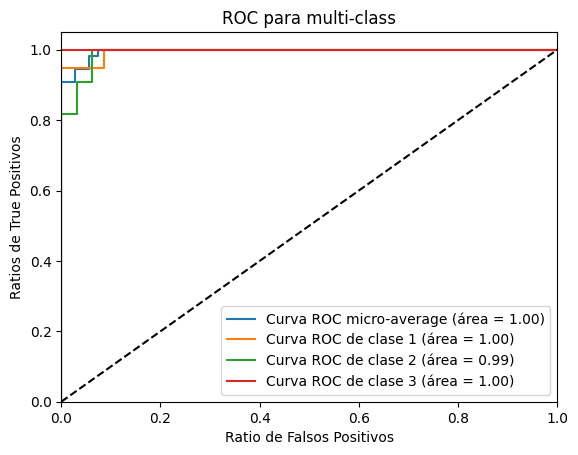

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

fpr = dict()
tpr = dict()
roc_auc = dict()

clases = df_vino['Class'].unique()  # Diferentes clases: diferentes valores de Class
n_clases = len(clases)  # Cantidad de clases diferentes

# Binarizar el test
y_test_bin = label_binarize(y_test, classes=clases)

# Entrenar un clasificador OneVsRest
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, label_binarize(y_train, classes=clases))
y_score = classifier.decision_function(X_test)

for i in range(n_clases):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())  # micro-medias ROC y AUC
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Dibujar la curva ROC
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='Curva ROC micro-average (área = {0:0.2f})'.format(roc_auc["micro"]))
for i in range(n_clases):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de clase {0} (área = {1:0.2f})'.format(clases[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratios de True Positivos')
plt.title('ROC para multi-class')
plt.legend(loc="lower right")
plt.show()


### PASO 2: MEJORAR EL MODELO

Aunque el modelo funciona bastante bien usando regresión logística, vamos a intentar mejorarlo en 
este paso usando técnicas de selección de características. El objetivo es detectar que columnas 
podemos eliminar. En esta ocasión vamos a usar la regularización para detectar que características son 
prescindibles

**g) ¿Qué significa estratificar los datos método de particionar en al hacer la división en train + test train y test el parámetro stratify=y**



**h) Utiliza un objeto ? Añade en la llamada al StandardScaler para estandarizar los datos de train entrenar. ¿Porqué es interesante estandarizar los datos?**

###  USAR REGULARIZACIÓN L1

 Estamos usando un modelo con 13 predictoras. La regresión logística es propensa a sufrir de overfitting 
si hay muchas predictoras. Vamos a usar regularización ℓ1 para que deje a 0 las características menos 
importantes y al detectarlas poder eliminarlas del entrenamiento

 **i) Indica que quieres usar regularización de tipo ℓ1 y deja el parámetro C= 1.0 ¿Qué ocurre si lo bajas, aumenta o disminuye la fuerza de la regularización?**

 **j) Vuelve a imprimir los coeficientes y los puntos de intercepción**
 
 **k) Como hemos usado una regularización de tipo ℓ1, nos habrá anulado las características menos importantes. Vamos a aprovechar esto para mostrarlas ordenadas de mayor a menor importancia. Haz un listado por consola donde aparezca el nombre de la característica, su importancia con 4 decimales y la importancia acumulada (la suma de importancias desde la más a la menos importante, una especie de ratio de importancia si usamos desde la primera hasta la actual)**

Para calcular la importancia de cada variable, miramos su coeficiente (la pendiente que tiene el hiperplano en esa variable, de manera que hacemos la suma del valor absoluto de las pendientes). Ten en cuenta que como hay 3 clases (3 productores posibles), los coeficientes de la recta son 3 filas y 13 columnas. Por simplificar, si hubiese 2 productores y 3 variables los coeficientes podían ser algo así:

 [[-1  2,  3], 
    [4, -5,  6]]

 Hay que generar la suma del valor absoluto de las pendientes (coeficientes), en el ejemplo de arriba sería (lo calculo para que se comprendan las operaciones que debes hacer):

[1 + 4 , 2 + 5, 3 + 6] = [5, 7, 9]

 Ahora calculamos la importancia relativa para ello calculamos la suma: 

5 + 7 + 9 = 21 

y dividimos cada elemento por el total (21 en el ejemplo):

 [0.238, 0.333, 0.428]

 Si ordenamos los valores o sacamos el índice de los elementos ordenados con 

indice = np.argsort(pesos)  # Obtenemos [0,1,2] de menor a mayor, se invierte: [2, 1,0]

**l) Y hacemos un gráfico de barras además de imprimir los valores. El resultado aproximado que se debería obtener:**

**m) Ahora elimina las características predictoras que se te han quedado con cero influencia y compara el desempeño de los dos modelos. ¿Hay diferencias significativas?**

